## Cryptography with Certified Deletion

### by Eric Culf, Sohrab Ganjian and Peter Yuen

In this project, we will explore cryptography with certified deletion, its applications and implentation. Our work follows the work of James Bartusek and Dakshita Khurana. The original paper can be found here:

[arxiv.org/pdf/2207.01754.pdf](https://arxiv.org/pdf/2207.01754.pdf)

This work is inspired by a paper from Anne Broadbent and Rabib Islam: 

[arxiv.org/pdf/1910.03551.pdf](https://arxiv.org/pdf/1910.03551.pdf)

So what is certified deletion and why is it important? To answer this question, suppose that Alice has written her will and would like to share her will with lawyer Bob, whom is going to store the will in a safebox. There are two scenarios to consider here:

<ol>
  <li>Upon the unfortunate passing away of Alice, Bob would reveal the content of the will.</li>
  <li>Prior to her passing, Alice chooses to invalidate her current will and requests that it be permanently deleted. While she may or may not revise the will's content, she wants Bob to furnish a valid certificate attesting to the proper deletion of her old will.</li>
</ol>

If Alice decides to delete her will, how can Bob provide a certifcate such that it is verfiable by Alice that Bob has acted in an honest manner? As it turns out, classical information can be easily copied, and there is no guarantee that the information has been removed. However, thanks to quantum cryptography, one can provide a valid certificate of deletion upon request which can be verified. Note that in this context, Alice's will would either be revealed or deleted, but not both. 

Of course, this is just one application of certified deletion, which has many more use cases. Below, we provide a few additional examples:

 - <b>Confidential business information:</b> A company might want to share confidential information with a partner or investor, but only if certain conditions are met. For example, they might want to ensure that the information is not shared with competitors or used for unauthorized purposes. In this case, the company could encrypt the information and give the key to a trusted third party who will only release it if the partner or investor agrees to certain terms and conditions.: 
 - <b>Classified information:</b> Government agencies and military organizations often use encryption to protect classified information. A trusted third party could hold the decryption key and only release it if certain conditions are met, such as a security breach or the need for a specific operation.
 
As you can see, certified deletion has significant implications for privacy in various settings.

In this project, we will provide an implementation of this idea with a small example. 

Now that we know what is certified deletion, let us see how can one implement this in practice:

The main result that we are using from the paper is in Corollary 4.8, which we mention here for reference, and then we will explain what this means:

Given any post-quantum semantically-secure public-key encryptin scheme $\text{PKE}=(\text{Gen, Enc, Dec})$, the scheme $\text{CD-PKE = (Gen, Enc', Dec', Del, Ver)}$ defined as follows is a public-key encryption scheme with certified deletion.

<ul>
  <li>$\text{Enc'(pk,m)}:$ sample $x, \theta \leftarrow \{0,1\}^{\lambda}$ and output
    $$\text{ct} \mathrel{:}= \left( |x\rangle_\theta, \text{Enc} \left( pk, \left(\theta, b \oplus \bigoplus_{i:\theta_i = 0} x_i \right) \right) \right)$$
      $$\text{vk} := (x, \theta)$$
    </li>
  <li>$\text{Dec'(sk,ct)}:$
parse $ct:=(|x\rangle_\theta, ct')$, compute ($\theta, b') \leftarrow \text{Dec(sk,ct')}$, measure $|x\rangle_\theta$ in the $\theta$-basis to obtain $x$, and output $b = b' \oplus \bigoplus_{i:\theta_i=0} x_i$</li>
    
    
  <li>$\text{Del(ct)}:$ parse $\text{ct}:= (|x \rangle_\theta, \text{ct'})$ and measure $|x\rangle_\theta$ in the Hadamard basis to obtain a string $x'$, and output $\text{cert}:=x'$</li>
    <li>$\text{Ver(vk, cert)}:$ parse $\text{vk}$ as $(x, \theta)$ and $\text{cert}$ as $x'$ and output $\text{T}$ if and only if $x_i = x_i'$ for all $i$ such that $\theta_i = 1$.  </li>
</ul>

<b> Explantion: </b>

A post-quantum cryptosystem refers to cryptosystems that are cryptographically secure against an adversary even with quantum resources. As Peter Shor demonstrated in [his paper](https://arxiv.org/pdf/quant-ph/9508027.pdf), quantum computers are capable of solving number-theoretic problems efficiently. Since then, cryptographers have been looking into developing new protocols that rely on problmes that are also computationally difficult for a quantum computer. 

A semantically-secure cryptosystem allows for the possibility that negligible information can be extracted from a ciphertext. While this may not sound perfect, for all real-life applications this is a reasonable assumption to make about a cryptosystem. 

$\text{PKE}$ stands for Public-key Encryption, which takes as input three parameters $\text{Gen, Enc, Dec}$

$\text{Gen}$ refers to the key generation algorithm. The key generation algorithm Gen takes a security paramter $\lambda$ as input and outputs a pair of keys $\text{(pk, sk)}$. The security parameter $\lambda$ is usually used to determine the length of the public and secret keys, as well as the number of random bits used by the encryption algorithm $\text{Enc}$. The exact values of these parameters may depend on the specific encryption scheme and the desired level of security. The public key $\text{pk}$ is used for encryption, while the secret key $\text{sk}$ is used for decryption.

$\text{Enc}$ is the encryption algorithm that takes as input a public key $\text{pk}$, which is generated be $\text{Gen}$, and a plaintext $m$ that we would like to encrypt. The output of this algorithm is a ciphertext, or the encrypted message, which is denoted by $\text{ct}$. 

$\text{Dec}$ is the decryption algorithm that takes as input a secret key $\text{sk}$, which is again generated by the $\text{Gen}$, and a ciphertext $\text{ct}$. The output of the algorithm is a plaintext $m'$. $m=m'$ with negligible probability, which means that the probability of the decryption algorithm producing an incorrect output, given a valid ciphertext and the correct secret key, is extremely small. 

$\text{CD-PKE}$ is the public-key encryption scheme with certified deletion, which takes as input $\text{(Gen, Enc', Dec', Del, Ver)}$. As we we will see, this encryption scheme is using the encyprtion scheme $\text{PKE(Gen, Enc, Dec)}$ as a foundational component.

The $\text{Gen}$ algorithm in CD-PKE is the same $\text{Gen}$ algorithm as in $\text{PKE}$. 

$\text{Enc'}$ works as follows: 

it takes a public key $\text{pk}$ and a message $m$ as input. Given $\lambda$ in $\text{Gen}$, the algorithm samples $x, \theta$ binary strings of length $\lambda$ uniformly at random. The algorithm then outputs a ciphertext $\text{ct}$ and a verification key $\text{vk}$.

The ciphertext is a quantum state represented by an ordered pair consisting of $|x\rangle_\theta$, and the output of the $\text{Enc}$ algorithm from a public-key encryption scheme. The $\text{Enc}$ algorithm takes as input the public key $\text{pk}$ and a plaintext that is the concatenation of $\theta$ and the result of XORing $b$ with the XOR of the binary string of $x$ where the corresponding bit of $\theta$ is 0.

The verification key is defined as the concatenation of $x$ and $\theta$. 

$\text{Dec'}$ works as follows: 

it takes a secret key $\text{sk}$ and a ciphertext $\text{ct}$ as input. We recall in this scheme the ciphertext is an ordered pair $(|x\rangle_\theta, \text{ct'})$. To use the decryption algorithm, we pass in the second argument of the ciphertext $\text{ct'}$ to the decytyption algorithm $\text{Dec}$ from the $\text{PKE}$ scheme along with the secret ket $\text{sk}$. The output of $\text{Dec}$ is yet another tuple $(\theta, b')$. 

We then measure $|x\rangle_\theta$, which is the first argument in the ordered pair of the ciphertext, in the $\theta$-basis to obtain $x$. That is, we turn the $|x\rangle_\theta$, which is in a quantum state to a binary string. We then compute $b = b' \oplus \bigoplus\limits_{i:\theta_i = 0}x_i$. 

$\text{Del}$ is the deletion algorithm, which like $\text{Dec'}$, takes the ciphertext as an input. However, instead of measuring $|x\rangle_\theta$ in $\theta$-basis, it would measure $|x\rangle_\theta$ in the Hadamard basis. We denote the output of the measurement $x'$ and $\text{Del}$ outputs a certificate $\text{cert}$, which is assigned to be $x'$. 

$\text{Ver}$ is the verification algorithm that takes as input a verification key $\text{vk}$ which contains an ordered pair $(x, \theta)$ and a certficate $\text{cert}=x'$. If $\theta_i = 1$, then we check if $x_i = x_i'$. If this condition is satified whenever $\theta_i=1$, then the verification algorithm outputs $\text{T}$, implying that the certificate has been verified. If there exists at least one $i$, such that $x_i \neq x_i'$ when $\theta_i = 1$, then the algorithm returns $\bot$, which implies that the certificate is not valid. 

## Intuition behind the security

The security of this certified deletion encryption is based on the uncertainty principle. This is a fundamental property of quantum systems, stating that there are measurements that are incompatible. That is, if you measure an observable, you lose information about the measurement result of a different observable. In this case, since we are working with qubit spaces, the two relevant measurements are measurement in the computational and Hadamard bases. The quantum ciphertext is composed of a list of qubits prepared in either the computational or Hadamard bases. In order to decrypt, we need the information encoded in the Hadamard basis qubits, whose measurement destroys the information encoded in the computational basis qubits. Conversely, to certify deletion, we need the information encoded in the computational basis qubits, which makes it impossible to decrypt the message correctly.

The compiler structure of the cryptosystem allows the encryption to combine classical security guarantees with the certified deletion encryption provided by quantum uncertainty. In our instantiation, we guarantee public-key encryption, by making use of a post-quantum encryption scheme.

## Post-quantum Cryptosystem

As the scheme suggests, we need to have a post-quantum cryptosystem at our disposal to be able to make use of the scheme. As post-quantum cryptography is an active area of research and is still being refined to this day, we chose to incorporate one of the older post-quantum cryptosystem in our work. Keep in mind that any post-quantum cryptosystem would have been fine, but here we say a few words on the choice of the cryptosystem that we had chosen:

Cryptosystem: NTRU

This scheme is developed by mathematician Jeffrey Hoffstein, Jill Pipher, and Joseph H. Silverman. The name NTRU, [according to Silverman](https://web.archive.org/web/20010125192900/http://www.brown.edu/Administration/George_Street_Journal/vol25/25GSJ01e.html), stand for "Number Theorists R Us".

This cryptosystem has been around since 1996, and while it did make it to [the 3rd round of the NIST](https://csrc.nist.gov/Projects/post-quantum-cryptography/post-quantum-cryptography-standardization/round-3-submissions) (National Institute of Standards and Technology) Post-Quantum Cryptography Standardization competition, unfortunately it did not make it to the fourth round. For more information, you can refer to the [Status Report on the Third Round of the
NIST Post-Quantum Cryptography
Standardization Process](https://nvlpubs.nist.gov/nistpubs/ir/2022/NIST.IR.8413-upd1.pdf). In short, another cryptosystem with similar characteristics, KYBER, has been favoured over NTRU. 

Having said this, for the purposes of this hackathon, NTRU is a suitable choice. Its implementation is publicly available and lightweight. We were able to incorporte and slightly modify one such [implementation into our work](https://github.com/pointedsphere/NTRU_python). 

## CD-PKE scheme

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# AWS imports: Import Braket SDK modules
# to install the Braket package: pip install amazon-braket-sdk https://pypi.org/project/amazon-braket-sdk/
from braket.circuits import Circuit
from braket.devices import LocalSimulator

import random

device = LocalSimulator()

We set $\lambda = 5$ for the purposes of demonstration. In practice, $5$ is considered too small. Since `lambda` is a [Python keyword](https://docs.python.org/3.10/reference/expressions.html#lambda), we will use `lambda_` instead. 

In [2]:
lambda_ = 5

In [3]:
def CD_Encrypt(b):
    # The algorithm Enc' from the paper.
    # Note that key generation is done within the post-quantum PKE scheme;
    # it occurs when 'encrypt' is called.
    # lambda_ is the parameter lambda from the paper; the number of qubits which we take
    # as lambda = 5 for proof of concept.
    
    # Input:
        # b: the bit to be encrypted
    # Output:
        # state: quantum ciphertext; a BB84 quantum state
        # ct: classical ciphertext; a list of binary ints
        # vk: verification key; a list with two sublists of binary ints, one for x and one for theta
    
    # Conjugate coding / BB84 state preparation

    x = random.choices([0,1], k = lambda_)
    theta = random.choices([0,1], k = lambda_)
    
    state = Circuit()
    for i in range(len(x)):
        if x[i] == 1:
            state.x(i)
        else:
            state.i(i)

    for i in range(len(theta)):
        if theta[i] == 1:
            state.h(i)
    
    # Hiding the message bit b by XORing

    m=b
    for i in range(len(theta)):
        if theta[i] == 0:
            m=(m+x[i]) % 2
    
    vk = [x,theta]
    
    # Calling the classical post-quantum PKE as 'encrypt' to encrypt the list
    # theta appended with the hidden message bit b
    message = theta.copy()
    message.append(m)
    cipher = encrypt(message)
    ct=list(cipher)
    for i in range(len(ct)):
        ct[i] = int(ct[i])
    
    return state, ct, vk

In [4]:
def CD_Decrypt(state, ct):
    # The algorithm Dec' from the paper

    # Inputs:
    #     state: quantum ciphertext; a BB84 state
    #     ct: classical ciphertext; a list of binary ints
    # Outputs:
    #     b: the encrypted bit
    
    
    # Call the post-quantum classical PKE as 'decrypt' to decrypt
    # the classical ciphertext
    cipher = ''.join(map(str, ct))
    dem = decrypt(cipher)
    plain_text = dem[len(dem)-(lambda_+1):]
    
    # Parse plain_text as (theta, b_prime)
    b_prime = plain_text[len(plain_text)-1]
    theta = plain_text.copy()
    theta.pop()
    
    # Measure the BB84 state in the theta basis
    for i in range(len(theta)):
        if theta[i] == 1:
            state.h(i)
    device = LocalSimulator()
    result = device.run(state, shots=1).result()
    x = result.measurements.tolist()[0]

    # Reveal the message bit b
    b = b_prime
    for i in range(len(theta)):
        if theta[i] == 0:
            b=(b+x[i]) % 2
    
    return b

In [5]:
def Delete(state, ct):
    # The algorithm Del from the paper

    # Input:
    #     state: quantum ciphertext; a BB84 state
    #     ct: classical ciphertext; a list of binary ints
    # Output:
    #     cert: deletion certificate; a list of binary ints
    
    # Measure the BB84 state in the Hadamard basis
    for i in range(lambda_):
        state.h(i)
    result = device.run(state, shots=1).result()
    cert = result.measurements.tolist()[0]
    
    return cert

In [6]:
def Verify(vk, cert):
    # The algorithm Ver from the paper

    # Input:
        # vk: a list with two sublists, one for the string x and one for the string theta
        # cert: a list of binary ints
    # Output:
        # True or False
    
    x = vk[0]
    theta = vk[1]
    
    # Checking if x and cert have the same value at each index where theta has a one
    for i in range(len(theta)):
        if theta[i] == 1:
            if x[i] != cert[i]:
                return False
    
    return True

## Small Example

In [7]:
%run NTRUpke.ipynb # this invokes the NTRU post-quantum encryption scheme

In the NTRU post-quantum encryption scheme, the `keygen()` function generates the public and private keys. The function takes an argument `secarg` which is set to "-M" by default. This flag specifies the security level of the generated keys.

The generated keys are stored in files named "key.priv" and "key.pub", which contain the private and public keys respectively. 

In [8]:
keygen("-M")

We will initialize bit `b=0` to demonstrate our implementation:

In [9]:
# Initialize b=0
b = 0

Then we encrypt `b` by running `CD_Encrypt(b)`. This will output quantum states $|x\rangle_\theta$ and the encryption of $\left(\theta, b \oplus \bigoplus_{i:\theta_i = 0} x_i \right)$ using the post-quantum encryption scheme and the verification key $\text{vk}$. 

In [10]:
state, ct, vk = CD_Encrypt(b)

In [11]:
# The quantum ciphertext; a BB84 state
print(state)

T  : |0|1|
          
q0 : -I-H-
          
q1 : -I-H-
          
q2 : -I---
          
q3 : -I---
          
q4 : -I-H-

T  : |0|1|


In [12]:
# The classical ciphertext, coming from the post-quantum PKE scheme
print(ct)

[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
# The verification key
print(vk)

[[0, 0, 0, 0, 0], [1, 1, 0, 0, 1]]


As a sanity check, if decrypt the ciphertext, we should get the initial bit `b` back. 

In [14]:
# Decrypt to get back the bit b=0
print(CD_Decrypt(state, ct))

0


Note that the order of operation is important here. If we decipher the message, we can no longer provide a valid certificate. Similarly, if the message is deleted first, before deciphering it, then the decipher message will no longer be true. 

We can verify this observation by the following experiment, where we are changing the order of decryption and deletion. 

In [15]:
# We honestly delete the ciphertext to produce a certificate
cert = Delete(state, ct)
print(cert)

[0, 0, 1, 1, 0]


In [16]:
### The certificate is accepted
Verify(vk, cert)

True

To illustrate the deletion process, we work out the statistics of this kind of experiment. First, we run an experiment where we decrypt first and then attempt to certify the deletion.

Text(0, 0.5, 'Percentage')

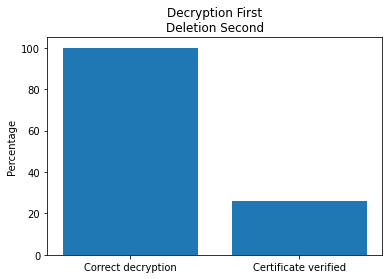

In [17]:
n=100
decpass=0
certpass=0
for i in range(n):
    b=random.randint(0,1)
    state, ct, vk = CD_Encrypt(b)
    bb = CD_Decrypt(state, ct)
    # We honestly delete the ciphertext to produce a certificate
    decpass += int(b==bb) # Decryption is correct if b == bb
    cert = Delete(state, ct)
    certpass += int(Verify(vk, cert)) # Certificate is accepted

plt.bar(["Correct decryption", "Certificate verified"], [decpass,certpass])
plt.title("Decryption First\nDeletion Second")
plt.ylabel('Percentage')
    

As expected, the decryption succeeds every time, but the certificate is only rarely verified. By increasing the security parameter $\lambda$, the percentage of the time that that the certificate is verified can be made arbitrarily small. That is, if the message is decrypted, it is impossible to verify that it has been deleted. Next, we change the order of the deletion and the decryption.

Text(0, 0.5, 'Percentage')

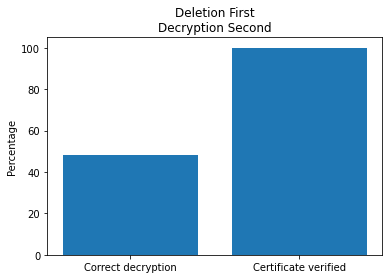

In [18]:
n=100
decpass=0
certpass=0
for i in range(n):
    b=random.randint(0,1)
    state, ct, vk = CD_Encrypt(b)
    cert = Delete(state, ct)
    certpass += int(Verify(vk, cert)) # Certificate is accepted
    bb = CD_Decrypt(state, ct)
    # We honestly delete the ciphertext to produce a certificate
    decpass += int(b==bb) # Decryption is correct if b == bb

plt.bar(["Correct decryption", "Certificate verified"], [decpass,certpass])
plt.title("Deletion First\nDecryption Second")
plt.ylabel('Percentage')

In this case, the deletion is certified every time, and the decryption is correct half the time. Since the message is a single bit, this means that, once the deletion has been certified, the message that is decrypted is uniformly random. So, the original message has been deleted.

## Concluding Remarks

To conclude, we were able to show that there is a feasible implementation of public key certified-deletion encryption. Since this uses few qubits and no entanglement, it is something that can be run on near-term devices. Further developments to this encryption include introducing error-correction to allow it to be run more effectively on a noisy device; and instantiating it with a homomorphic encryption scheme to allow for computation with the encrypted data.

## References

Bartusek and Khurana. Cryptography with Certified Deletion. 2022. arxiv.org/pdf/2207.01754.pdf

Broadbent and Islam. Quantum encryption with certified deletion. In Rafael Pass and Krzysztof Pietrzak, editors, Theory of Cryptography, pages 92–122, Cham, 2020. Springer International Publishing

Image Credits:
designed by Freepik, Smashicons, monkik, Parzival’ 1997, Pixelmeetup, riajulislam from Flaticon